# Credit card offer

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

## Define a goal

**GOAL: Know if a customer will accept a credit card offer or not.**

## Get data

In [2]:
headers =  ['customer_number', 'offer_accepted', 'reward', 'mailer_type', 'income_level', 'bank_accounts_open', 'overdraft_protection', 'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size', 'own_your_home', 'avg_balance', 'balance_q1',
            'balance_q2', 'balance_q3', 'balance_q4']

In [3]:
data = pd.read_csv('./creditcardmarketing.csv', header=None, names = headers)

In [4]:
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,avg_balance,balance_q1,balance_q2,balance_q3,balance_q4
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [5]:
data.shape

(18000, 17)

## Explore data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  avg_balance           17976 non-null  float64
 13  balance_q1            17976 non-null  float64
 14  balance_q2            17976 non-null  float64
 15  balance_q3         

In [7]:
data.isna().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
avg_balance             24
balance_q1              24
balance_q2              24
balance_q3              24
balance_q4              24
dtype: int64

In [8]:
data.isna().sum() / data.shape[0]

customer_number         0.000000
offer_accepted          0.000000
reward                  0.000000
mailer_type             0.000000
income_level            0.000000
bank_accounts_open      0.000000
overdraft_protection    0.000000
credit_rating           0.000000
credit_cards_held       0.000000
homes_owned             0.000000
household_size          0.000000
own_your_home           0.000000
avg_balance             0.001333
balance_q1              0.001333
balance_q2              0.001333
balance_q3              0.001333
balance_q4              0.001333
dtype: float64

* We have null values so we need to know what we will do with them.

## Dealing with missing values

In [9]:
data.isna().sum()[data.isna().sum() > 0]

avg_balance    24
balance_q1     24
balance_q2     24
balance_q3     24
balance_q4     24
dtype: int64

* I decided to remove those observations because my dataset has a 18,000 observations, I think that 24 are deprecable.

In [10]:
data = data.dropna()

In [11]:
data.shape

(17976, 17)

## Split data into categorical and numerical

### Categorical data

In [12]:
categorical_data = data.select_dtypes(object)

In [13]:
categorical_data.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'overdraft_protection', 'credit_rating', 'own_your_home'],
      dtype='object')

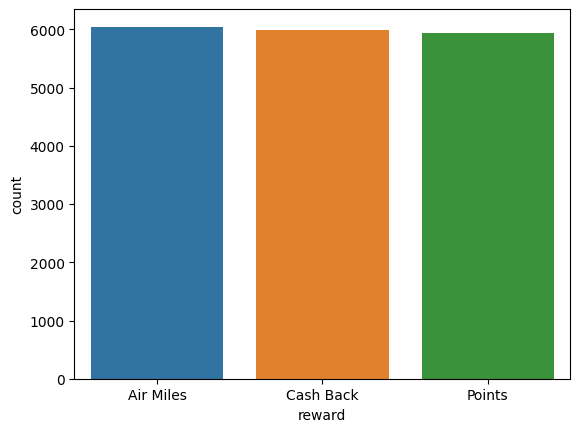

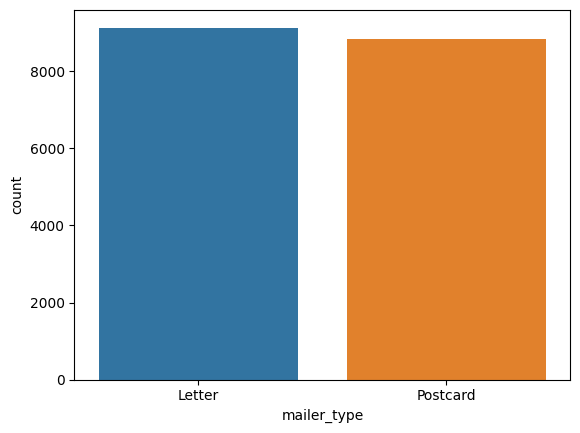

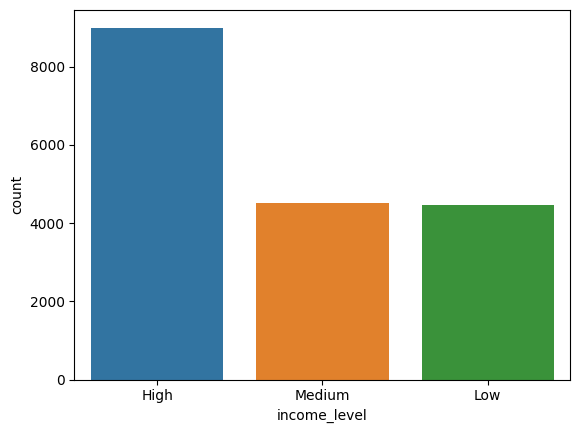

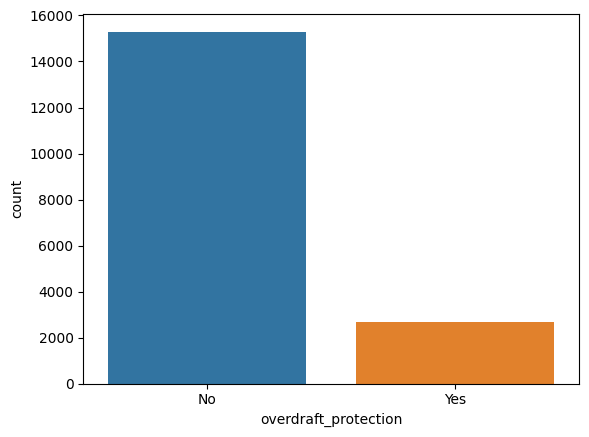

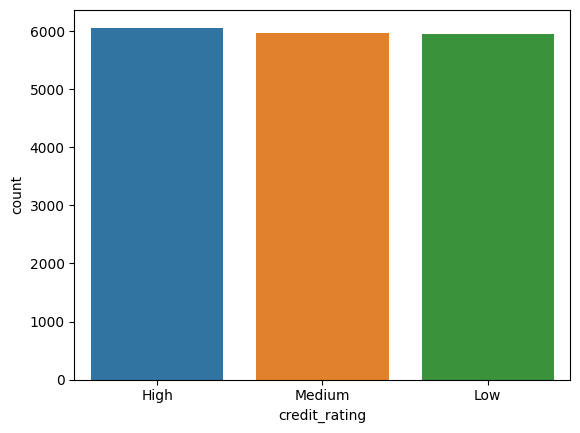

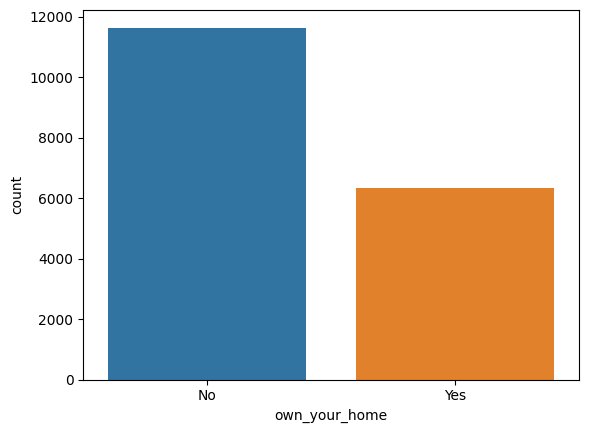

In [14]:
for column in categorical_data.drop(columns=['offer_accepted']).columns:
    sns.barplot(data = data, x = categorical_data[column].unique(), y = categorical_data[column].value_counts(dropna=False))
    plt.xlabel(column)
    plt.show()

In [15]:
# Encoding data
categories = [['Low', 'Medium', 'High']]

ordinal_encoder = OrdinalEncoder(categories=categories)

In [16]:
income_oe_data = ordinal_encoder.fit_transform(categorical_data[['income_level']])

In [17]:
rating_oe_data = ordinal_encoder.fit_transform(categorical_data[['credit_rating']])

In [18]:
categorical_data = categorical_data.drop(columns=['income_level', 'credit_rating', 'offer_accepted'])

In [19]:
categorical_data.columns

Index(['reward', 'mailer_type', 'overdraft_protection', 'own_your_home'], dtype='object')

In [20]:
categorical_data = pd.get_dummies(categorical_data, drop_first=True)

In [21]:
categorical_data = categorical_data.reset_index(drop=True)

In [22]:
categorical_data

,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
0,False,False,False,False,False
1,False,False,False,False,True
2,False,False,True,False,True
3,False,False,False,False,False
4,False,False,False,False,True
...,...,...,...,...,...
17971,True,False,False,False,True
17972,True,False,False,False,True
17973,True,False,False,False,False
17974,True,False,False,False,True


In [23]:
income_data = pd.DataFrame(income_oe_data, columns=['income_level'])

In [24]:
income_data = income_data.reset_index(drop = True)

In [25]:
income_data

,income_level
0,2.0
1,1.0
2,2.0
3,1.0
4,1.0
...,...
17971,2.0
17972,2.0
17973,2.0
17974,1.0


In [26]:
income_data.shape

(17976, 1)

In [27]:
rating_data = pd.DataFrame(rating_oe_data, columns=['credit_rating'])

In [28]:
rating_data = rating_data.reset_index(drop = True)

In [30]:
rating_data

,credit_rating
0,2.0
1,1.0
2,1.0
3,2.0
4,1.0
...,...
17971,0.0
17972,0.0
17973,0.0
17974,1.0


In [29]:
rating_data.shape

(17976, 1)

In [31]:
categorical_data = pd.concat([categorical_data, income_data, rating_data], axis = 1)

In [32]:
categorical_data

,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,income_level,credit_rating
0,False,False,False,False,False,2.0,2.0
1,False,False,False,False,True,1.0,1.0
2,False,False,True,False,True,2.0,1.0
3,False,False,False,False,False,1.0,2.0
4,False,False,False,False,True,1.0,1.0
...,...,...,...,...,...,...,...
17971,True,False,False,False,True,2.0,0.0
17972,True,False,False,False,True,2.0,0.0
17973,True,False,False,False,False,2.0,0.0
17974,True,False,False,False,True,1.0,1.0


### Numerical data

In [ ]:
numerical_data = data.select_dtypes(np.number)

In [ ]:
numerical_data.columns

In [ ]:
for column in numerical_data.drop(columns=['customer_number']).columns[4:]:
    sns.histplot(numerical_data[column])
    plt.show()

## Checking data balance (classes)

In [ ]:
accepted, not_accepted = data['offer_accepted'].value_counts()

In [ ]:
print('Percentage of those clients that accepted the offer: {: .2f}%'.format(accepted / (accepted + not_accepted) * 100))
print("Percentage of those clients that didn't accept the offer: {: .2f}%".format(not_accepted / (accepted + not_accepted) * 100))

In [ ]:
sns.countplot(x = categorical_data['offer_accepted'], data = data)
plt.show()

* We can notice that we have imbalanced into our target.

## Split into train and test dataset

In [ ]:
def transform_target(row):
    if row == 'No':
        return 0
    else:
        return 1

In [ ]:
data['offer_accepted'] = data['offer_accepted'].apply(lambda x: transform_target(x))

In [ ]:
data['offer_accepted'] = data['offer_accepted'].astype(np.int64)

In [ ]:
y = data['offer_accepted']

In [ ]:
y.shape

In [ ]:
X = data.drop(columns=['offer_accepted'])

In [ ]:
X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)